# Import the needed Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Import our Shiba inu data file

In [3]:
df = pd.read_csv('./desktop/Data science/data sets/SHIB-USD.csv', index_col = 'Date', parse_dates= True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-14,0.000029,0.000030,0.000027,0.000027,0.000027,2727081948
2021-10-15,0.000027,0.000027,0.000023,0.000025,0.000025,4121246428
2021-10-16,0.000025,0.000027,0.000025,0.000026,0.000026,1871226740
2021-10-17,0.000026,0.000029,0.000024,0.000028,0.000028,2304858857
2021-10-18,0.000028,0.000030,0.000026,0.000029,0.000029,3919367323


# Check that there are no null columns

In [4]:
nandf = df[df.isna().any(axis= 1)]
nandf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


# Create columns that calculate the moving averages, over 10, 20, 50 days

In [5]:
df['SMA10'] = df['Close'].rolling(10).mean()
df.dropna(inplace = True)

In [6]:
df['SMA20'] = df['Close'].rolling(20).mean()


In [7]:
df['SMA50'] = df['Close'].rolling(50).mean()


In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA10,SMA20,SMA50
Date,,,,,,,,,
2021-10-23,0.000028,0.000035,0.000028,0.000034,0.000034,4703212108,0.000028,NaN,NaN
2021-10-24,0.000034,0.000044,0.000034,0.000036,0.000036,15337292521,0.000029,NaN,NaN
2021-10-25,0.000036,0.000044,0.000035,0.000042,0.000042,8244210217,0.000031,NaN,NaN
2021-10-26,0.000042,0.000049,0.000041,0.000048,0.000048,11176750625,0.000033,NaN,NaN
2021-10-27,0.000048,0.000087,0.000047,0.000080,0.000080,39053846018,0.000038,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-10-10,0.000011,0.000011,0.000010,0.000010,0.000010,192456230,0.000011,0.000011,0.000012
2022-10-11,0.000010,0.000010,0.000010,0.000010,0.000010,225078484,0.000011,0.000011,0.000012
2022-10-12,0.000010,0.000010,0.000010,0.000010,0.000010,128040822,0.000011,0.000011,0.000012


# Plotting the SMA chart

<AxesSubplot:xlabel='Date'>

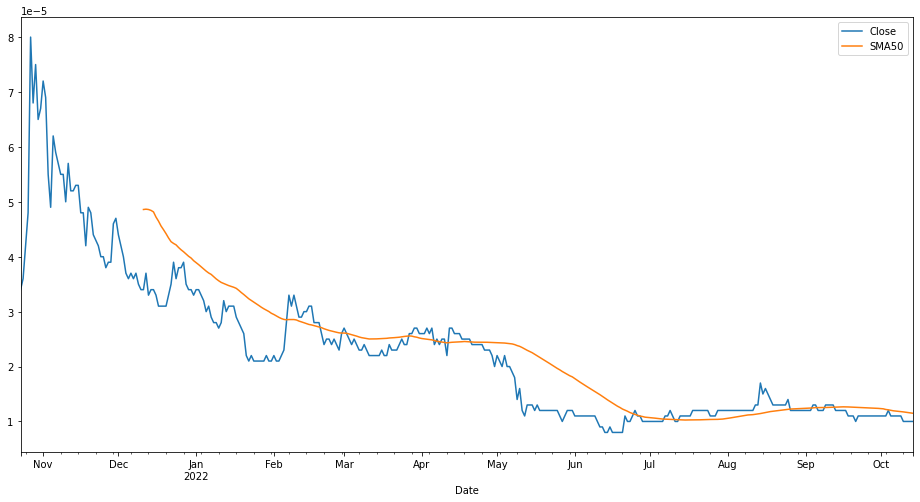

In [9]:
df[['Close', 'SMA50']].plot(label = 'SHIB M.A', figsize = (16, 8))

# Add Exponential moving average column

In [10]:
df['EMA10'] = df['Close'].ewm(span= 10).mean()

In [11]:
df['EMA20'] = df['Close'].ewm(span= 20).mean()

In [12]:
df['EMA50'] = df['Close'].ewm(span= 50).mean()

In [13]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA10,SMA20,SMA50,EMA10,EMA20,EMA50
Date,,,,,,,,,,,,
2021-10-23,0.000028,0.000035,0.000028,0.000034,0.000034,4703212108,0.000028,NaN,NaN,0.000034,0.000034,0.000034
2021-10-24,0.000034,0.000044,0.000034,0.000036,0.000036,15337292521,0.000029,NaN,NaN,0.000035,0.000035,0.000035
2021-10-25,0.000036,0.000044,0.000035,0.000042,0.000042,8244210217,0.000031,NaN,NaN,0.000038,0.000038,0.000037
2021-10-26,0.000042,0.000049,0.000041,0.000048,0.000048,11176750625,0.000033,NaN,NaN,0.000041,0.000041,0.000040
2021-10-27,0.000048,0.000087,0.000047,0.000080,0.000080,39053846018,0.000038,NaN,NaN,0.000052,0.000050,0.000049
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-10,0.000011,0.000011,0.000010,0.000010,0.000010,192456230,0.000011,0.000011,0.000012,0.000011,0.000011,0.000012
2022-10-11,0.000010,0.000010,0.000010,0.000010,0.000010,225078484,0.000011,0.000011,0.000012,0.000011,0.000011,0.000011
2022-10-12,0.000010,0.000010,0.000010,0.000010,0.000010,128040822,0.000011,0.000011,0.000012,0.000011,0.000011,0.000011


<AxesSubplot:xlabel='Date'>

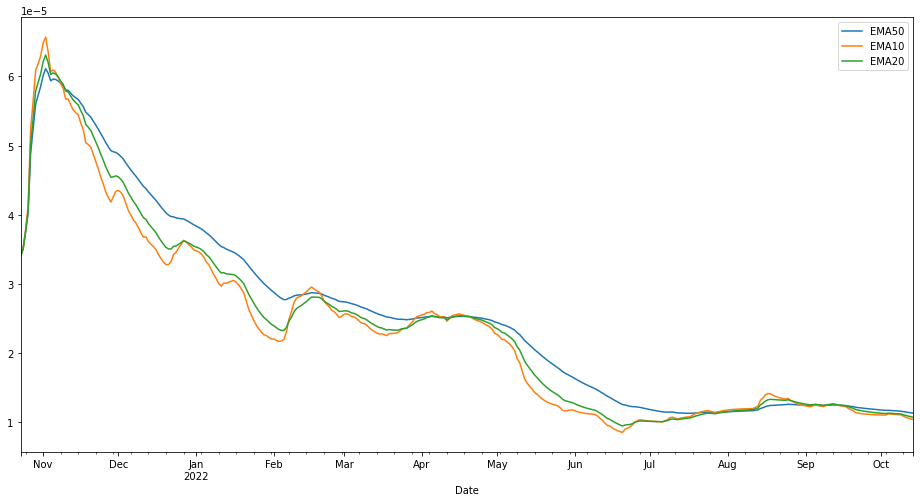

In [14]:
df[['EMA50', 'EMA10', 'EMA20']].plot(label = 'SHIB M.A', figsize = (16, 8))

In [15]:
corr_df = df.corr()

In [16]:
corr_df

,Open,High,Low,Close,Adj Close,Volume,SMA10,SMA20,SMA50,EMA10,EMA20,EMA50
Open,1.000000,0.984914,0.990124,0.979693,0.979693,0.565576,0.963472,0.972013,0.914438,0.985202,0.973891,0.952938
High,0.984914,1.000000,0.980231,0.993965,0.993965,0.671247,0.945856,0.970974,0.913394,0.977463,0.964226,0.941202
Low,0.990124,0.980231,1.000000,0.986237,0.986237,0.530445,0.967134,0.964917,0.904230,0.986001,0.975540,0.955977
Close,0.979693,0.993965,0.986237,1.000000,1.000000,0.635595,0.949825,0.967465,0.910787,0.979245,0.966516,0.944879
Adj Close,0.979693,0.993965,0.986237,1.000000,1.000000,0.635595,0.949825,0.967465,0.910787,0.979245,0.966516,0.944879
Volume,0.565576,0.671247,0.530445,0.635595,0.635595,1.000000,0.447994,0.642428,0.459812,0.531616,0.504081,0.468030
SMA10,0.963472,0.945856,0.967134,0.949825,0.949825,0.447994,1.000000,0.991887,0.940112,0.990734,0.991475,0.978991
SMA20,0.972013,0.970974,0.964917,0.967465,0.967465,0.642428,0.991887,1.000000,0.967265,0.992313,0.997767,0.988663
SMA50,0.914438,0.913394,0.904230,0.910787,0.910787,0.459812,0.940112,0.967265,1.000000,0.945771,0.971220,0.993281
EMA10,0.985202,0.977463,0.986001,0.979245,0.979245,0.531616,0.990734,0.992313,0.945771,1.000000,0.996496,0.980854


In [17]:
X = df['EMA10'].values
Y = df['Close'].values

# Determining M and C

In [18]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)

n = len(X)

#b1 = m and b2 = c

numer = 0
denom = 0

for i in range(n):
    numer += (X[i]- mean_X)*(Y[i] - mean_Y)
    denom += (X[i]-mean_X)**2
    
b1 = numer/denom
b0 = mean_Y - (b1 * mean_X)
    
#print M and C
print(b1 , b0)

0.9886001501305915 -1.899571087074789e-07


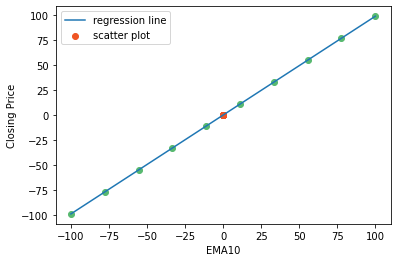

In [19]:
max_X = np.max(X) + 100
min_X = np.min(X) - 100

#Calculating line values of x and y
x = np.linspace(min_X, max_X, 10)
y = b0 + b1*x

#plotting line
plt.plot(x, y, label= 'regression line')
plt.scatter (X, Y, c = '#ef5423', label = 'scatter plot')
plt.scatter(x,y, c = '#58b970')

plt.xlabel('EMA10')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [20]:
ss_t = 0
ss_r = 0

for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_Y) **2
    ss_r += (Y[i] - y_pred) **2

r2 = 1 - (ss_r/ss_t)

print(r2)

0.9589209668051027


# Using Sklearn

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
X = X.reshape(n,1)

# Create model

In [23]:
reg = LinearRegression()

In [24]:
reg = reg.fit(X, Y)

# Making Price predictions

In [25]:
Y_pred = reg.predict(X)
Y_pred = Y_pred.astype('str')


In [26]:
df['Price_pred'] = pd.to_numeric(Y_pred)
df

,Open,High,Low,Close,Adj Close,Volume,SMA10,SMA20,SMA50,EMA10,EMA20,EMA50,Price_pred
Date,,,,,,,,,,,,,
2021-10-23,0.000028,0.000035,0.000028,0.000034,0.000034,4703212108,0.000028,NaN,NaN,0.000034,0.000034,0.000034,0.000033
2021-10-24,0.000034,0.000044,0.000034,0.000036,0.000036,15337292521,0.000029,NaN,NaN,0.000035,0.000035,0.000035,0.000035
2021-10-25,0.000036,0.000044,0.000035,0.000042,0.000042,8244210217,0.000031,NaN,NaN,0.000038,0.000038,0.000037,0.000037
2021-10-26,0.000042,0.000049,0.000041,0.000048,0.000048,11176750625,0.000033,NaN,NaN,0.000041,0.000041,0.000040,0.000041
2021-10-27,0.000048,0.000087,0.000047,0.000080,0.000080,39053846018,0.000038,NaN,NaN,0.000052,0.000050,0.000049,0.000052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-10,0.000011,0.000011,0.000010,0.000010,0.000010,192456230,0.000011,0.000011,0.000012,0.000011,0.000011,0.000012,0.000011
2022-10-11,0.000010,0.000010,0.000010,0.000010,0.000010,225078484,0.000011,0.000011,0.000012,0.000011,0.000011,0.000011,0.000010
2022-10-12,0.000010,0.000010,0.000010,0.000010,0.000010,128040822,0.000011,0.000011,0.000012,0.000011,0.000011,0.000011,0.000010


<AxesSubplot:xlabel='Date'>

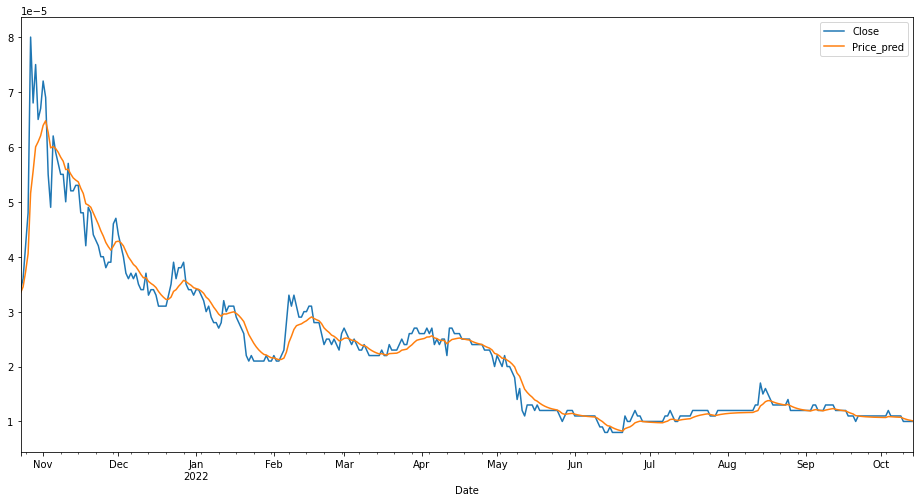

In [27]:
df[[ 'Close', 'Price_pred']].plot(label = 'SHIB M.A', figsize = (16, 8))

In [28]:
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:96: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


In [29]:
print(r2_score)
print(np.sqrt(mse))

0.9589209668051029
2.7539211854725026e-06


In [30]:
import pickle

In [32]:
filename = 'shib-model.sav'
pickle.dump(reg, open(filename, 'wb'))